#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

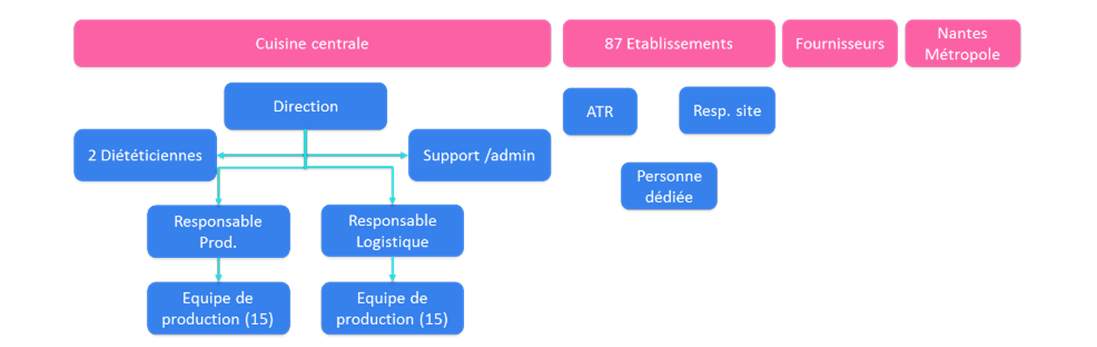

### 4 - Processus actuel

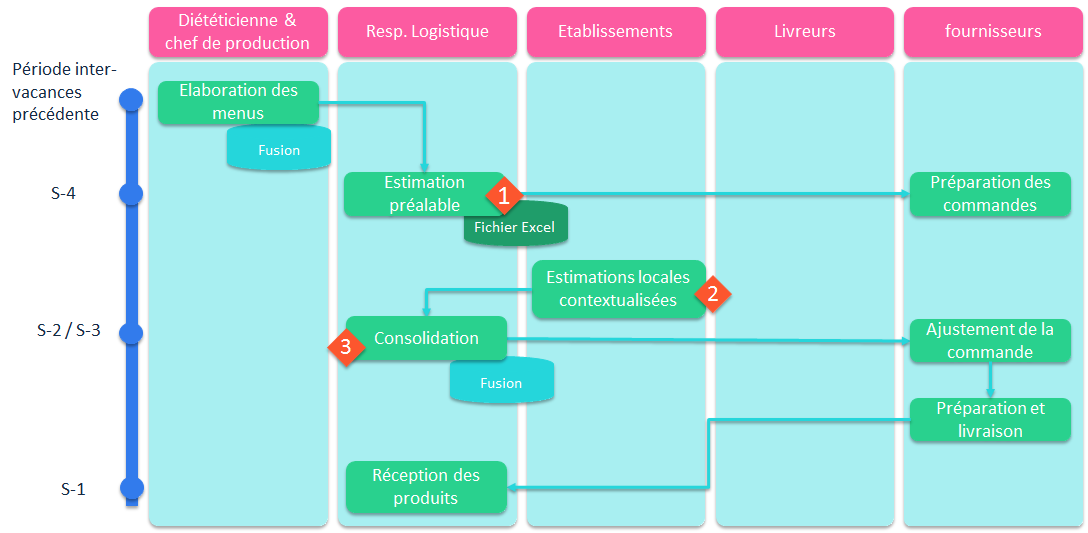

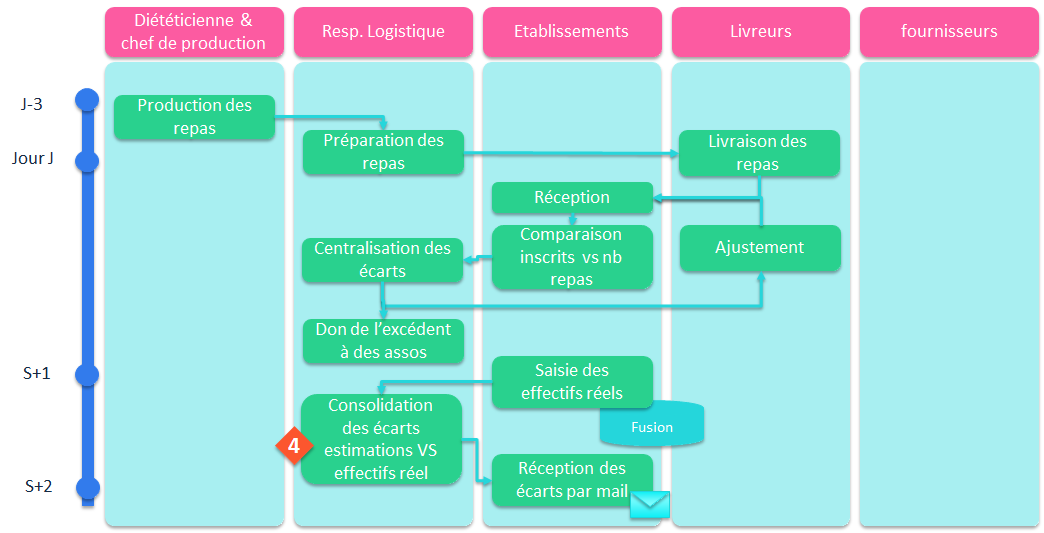

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
frequentation = pd.read_csv("frequentation.csv")

In [4]:
frequentation

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,0,0,0,0,7200,6453,493,12309,11302,17373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,0,0,0,0,1274,9715,99,15991,10898,20685
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,0,0,0,0,1274,9715,99,15885,6442,20685
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,0,0,0,0,1274,9715,99,17436,9168,20685
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,0,0,0,0,1447,6839,441,16062,12371,20685


In [5]:
frequentation.columns

Index(['Unnamed: 0', 'date', 'annee_scolaire', 'jour', 'semaine', 'mois',
       'greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances',
       'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan',
       'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif'],
      dtype='object')

In [6]:
frequentation.duplicated().sum()

0

In [7]:
frequentation.isnull().sum()

Unnamed: 0         0
date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
greves             0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
dtype: int64

In [8]:
frequentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1188 non-null   int64 
 1   date             1188 non-null   object
 2   annee_scolaire   1188 non-null   object
 3   jour             1188 non-null   object
 4   semaine          1188 non-null   int64 
 5   mois             1188 non-null   object
 6   greves           1188 non-null   int64 
 7   ferie            1188 non-null   int64 
 8   veille_ferie     1188 non-null   int64 
 9   retour_ferie     1188 non-null   int64 
 10  vacances         1188 non-null   int64 
 11  retour_vacances  1188 non-null   int64 
 12  veille_vacances  1188 non-null   int64 
 13  fete_musulmane   1188 non-null   int64 
 14  ramadan          1188 non-null   int64 
 15  fete_chretienne  1188 non-null   int64 
 16  fete_juive       1188 non-null   int64 
 17  inc_grippe       1188 non-null   

In [9]:
frequentation.describe(include = 'all')

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
count,1188.000000,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,...,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,NaN,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,141,300,NaN,146,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,593.500000,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,...,0.022727,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226
std,343.090367,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,...,0.149095,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000
25%,296.750000,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000
50%,593.500000,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000
75%,890.250000,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000


In [10]:
menus = pd.read_csv("menus.csv")

In [11]:
menus

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,1184,2019-12-10,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,1185,2019-12-13,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,1186,2019-12-16,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [12]:
menus.duplicated().sum()

0

In [13]:
menus.isnull().sum()

Unnamed: 0    0
date          0
menu          0
porc          0
viande        0
poisson       0
bio           0
noel          0
frites        0
an_chinois    0
dtype: int64

In [14]:
menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1188 non-null   int64 
 1   date        1188 non-null   object
 2   menu        1188 non-null   object
 3   porc        1188 non-null   int64 
 4   viande      1188 non-null   int64 
 5   poisson     1188 non-null   int64 
 6   bio         1188 non-null   int64 
 7   noel        1188 non-null   int64 
 8   frites      1188 non-null   int64 
 9   an_chinois  1188 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 92.9+ KB


In [15]:
menus.describe(include = 'all')

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
count,1188.000000,1188,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,NaN,1188,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-03,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,593.500000,NaN,NaN,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367
std,343.090367,NaN,NaN,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953
min,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,296.750000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,593.500000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,890.250000,NaN,NaN,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000


# Jonction des dataframes

In [16]:
# jonction des dataframes frequentation et menu
df_final = frequentation.merge(menus, on = "date")

# suppression des colonnes Unnamed: 0_x et Unnamed: 0_y
df_final.drop(["Unnamed: 0_x", "Unnamed: 0_y"], axis = 1, inplace = True)
df_final.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,11129,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,11808,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,11741,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,12322,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,11302,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0


In [17]:
# création de la colonne fréquentation (en %)

df_final["frequentation"] = (df_final["reel"]/df_final["effectif"])*100

In [18]:
df_final.duplicated().sum()

0

In [19]:
df_final.isnull().sum()

date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
greves             0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
menu               0
porc               0
viande             0
poisson            0
bio                0
noel               0
frites             0
an_chinois         0
frequentation      0
dtype: int64

In [20]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1188 non-null   object 
 1   annee_scolaire   1188 non-null   object 
 2   jour             1188 non-null   object 
 3   semaine          1188 non-null   int64  
 4   mois             1188 non-null   object 
 5   greves           1188 non-null   int64  
 6   ferie            1188 non-null   int64  
 7   veille_ferie     1188 non-null   int64  
 8   retour_ferie     1188 non-null   int64  
 9   vacances         1188 non-null   int64  
 10  retour_vacances  1188 non-null   int64  
 11  veille_vacances  1188 non-null   int64  
 12  fete_musulmane   1188 non-null   int64  
 13  ramadan          1188 non-null   int64  
 14  fete_chretienne  1188 non-null   int64  
 15  fete_juive       1188 non-null   int64  
 16  inc_grippe       1188 non-null   int64  
 17  inc_gastro    

In [21]:
df_final.describe(include = 'all')

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,frequentation
count,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,...,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,NaN,...,NaN,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,141,300,NaN,146,NaN,NaN,NaN,NaN,NaN,...,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,0.027778,...,18890.589226,NaN,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367,67.852347
std,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,0.164405,...,1013.282762,NaN,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953,12.481810
min,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,17373.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,17955.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.435838
50%,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,18633.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.311207
75%,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,19958.000000,NaN,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,72.279556


# Exploration

In [22]:
df_final["greves"].value_counts()

greves
0    1083
1     105
Name: count, dtype: int64

<Axes: xlabel='greves'>

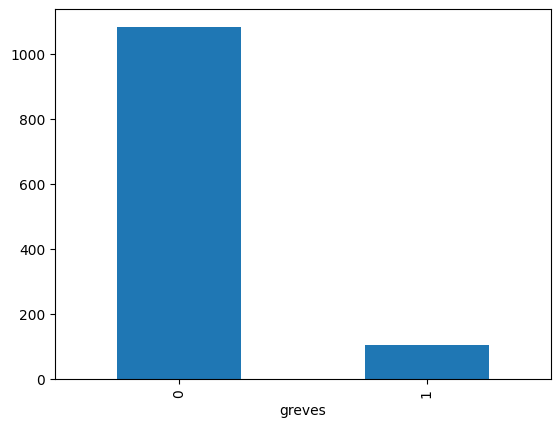

In [23]:
df_final["greves"].value_counts().plot(kind = "bar")

In [24]:
df_final["ferie"].value_counts() # férié à supprimer

ferie
0    1187
1       1
Name: count, dtype: int64

<Axes: xlabel='ferie'>

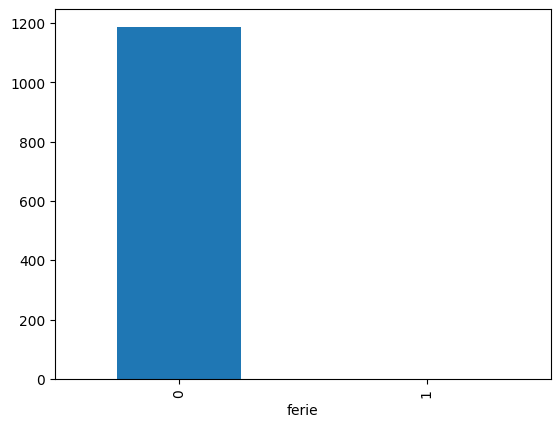

In [25]:
df_final["ferie"].value_counts().plot(kind = "bar")

In [26]:
df_final["veille_ferie"].value_counts()

veille_ferie
0    1172
1      16
Name: count, dtype: int64

<Axes: xlabel='veille_ferie'>

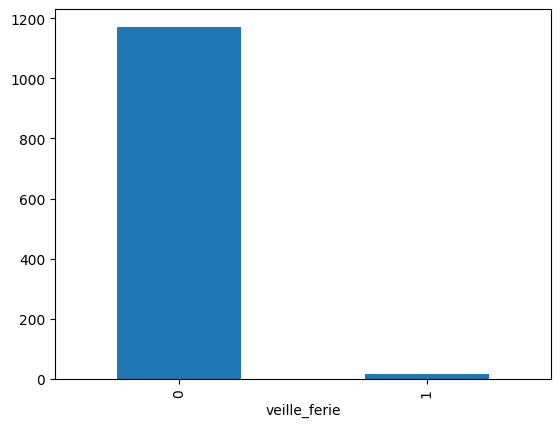

In [27]:
df_final["veille_ferie"].value_counts().plot(kind = "bar")

In [28]:
df_final["retour_ferie"].value_counts()

retour_ferie
0    1163
1      25
Name: count, dtype: int64

<Axes: xlabel='retour_ferie'>

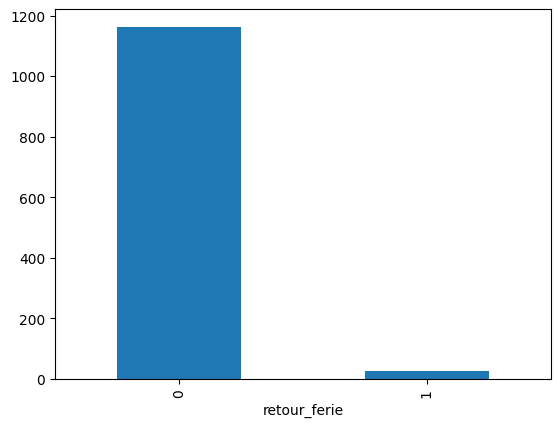

In [29]:
df_final["retour_ferie"].value_counts().plot(kind = "bar")

In [30]:
df_final["vacances"].value_counts()

vacances
0    1155
1      33
Name: count, dtype: int64

<Axes: xlabel='vacances'>

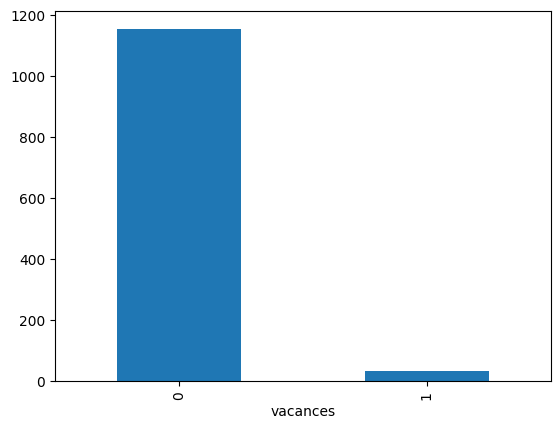

In [31]:
df_final["vacances"].value_counts().plot(kind = "bar")

In [32]:
df_final["retour_vacances"].value_counts()

retour_vacances
0    1156
1      32
Name: count, dtype: int64

<Axes: xlabel='retour_vacances'>

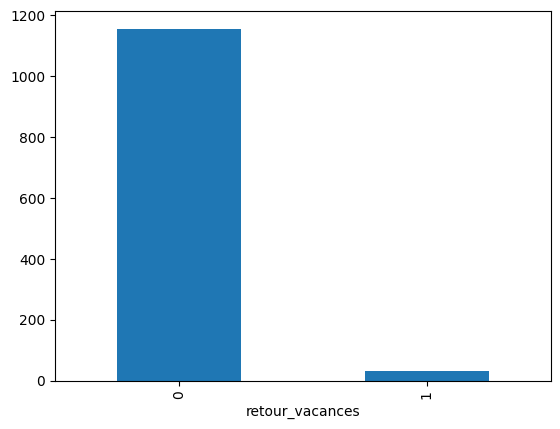

In [33]:
df_final["retour_vacances"].value_counts().plot(kind = "bar")

In [34]:
df_final["veille_vacances"].value_counts()

veille_vacances
0    1157
1      31
Name: count, dtype: int64

<Axes: xlabel='veille_vacances'>

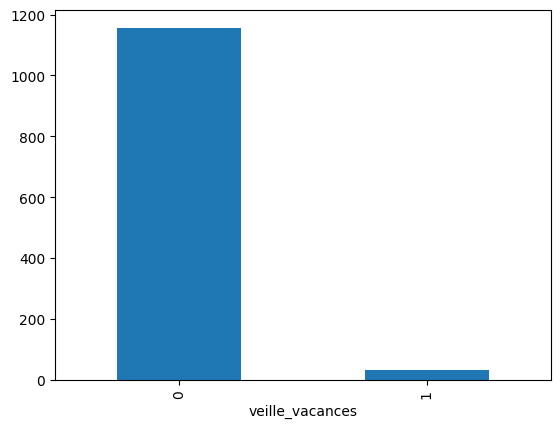

In [35]:
df_final["veille_vacances"].value_counts().plot(kind = "bar")

In [36]:
df_final["fete_musulmane"].value_counts()

fete_musulmane
0    1161
1      27
Name: count, dtype: int64

<Axes: xlabel='fete_musulmane'>

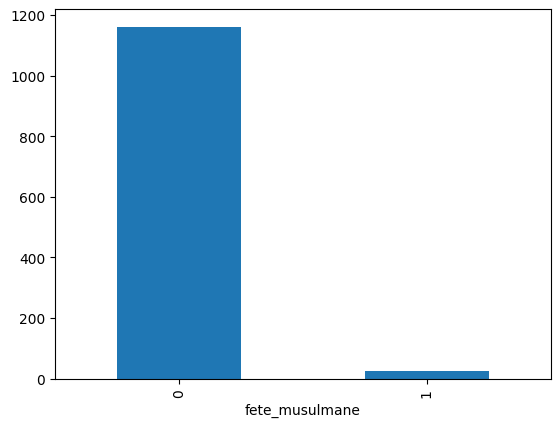

In [37]:
df_final["fete_musulmane"].value_counts().plot(kind = "bar")

In [38]:
df_final["ramadan"].value_counts()

ramadan
0    1122
1      66
Name: count, dtype: int64

<Axes: xlabel='ramadan'>

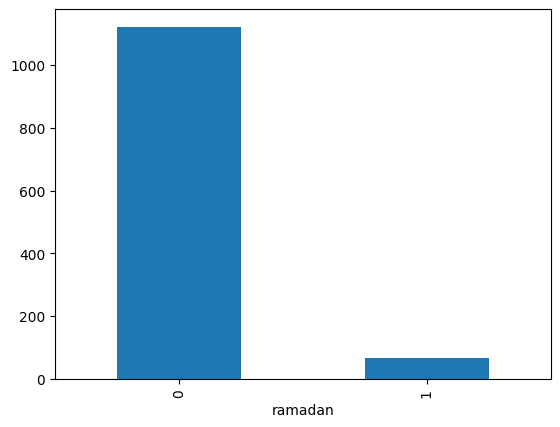

In [39]:
df_final["ramadan"].value_counts().plot(kind = "bar")

In [40]:
df_final["fete_chretienne"].value_counts()

fete_chretienne
0    1097
1      91
Name: count, dtype: int64

<Axes: xlabel='fete_chretienne'>

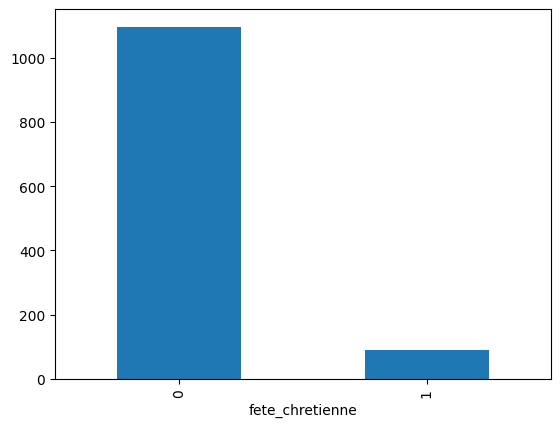

In [41]:
df_final["fete_chretienne"].value_counts().plot(kind = "bar")

In [42]:
df_final["fete_juive"].value_counts()

fete_juive
0    1155
1      33
Name: count, dtype: int64

<Axes: xlabel='fete_juive'>

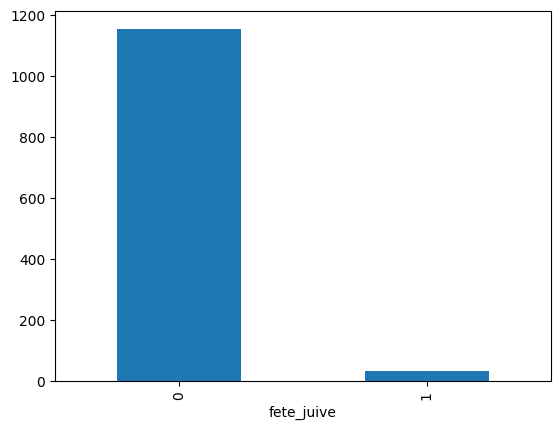

In [43]:
df_final["fete_juive"].value_counts().plot(kind = "bar")

In [44]:
df_final["porc"].value_counts()

porc
0    1025
1     163
Name: count, dtype: int64

<Axes: xlabel='porc'>

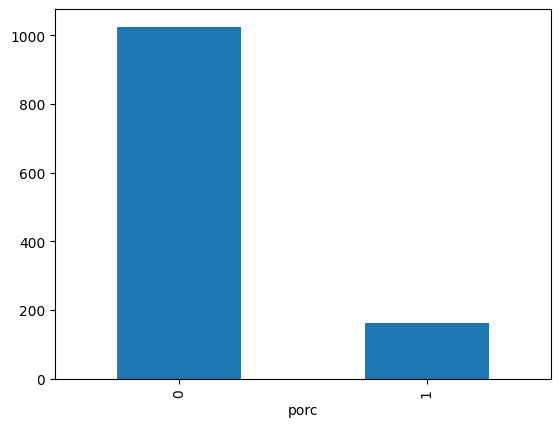

In [45]:
df_final["porc"].value_counts().plot(kind = "bar")

In [46]:
df_final["viande"].value_counts()

viande
1    669
0    519
Name: count, dtype: int64

<Axes: xlabel='viande'>

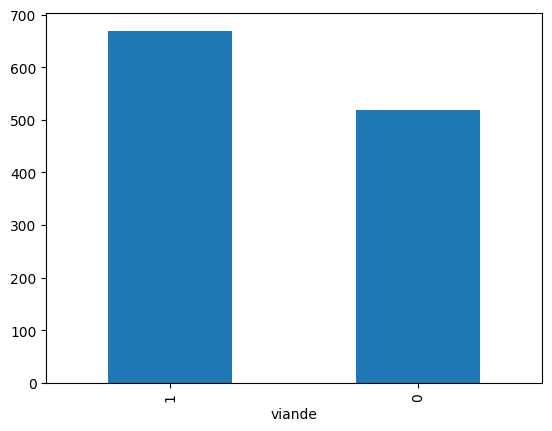

In [47]:
df_final["viande"].value_counts().plot(kind = "bar")

In [48]:
df_final["poisson"].value_counts()

poisson
0    891
1    297
Name: count, dtype: int64

<Axes: xlabel='poisson'>

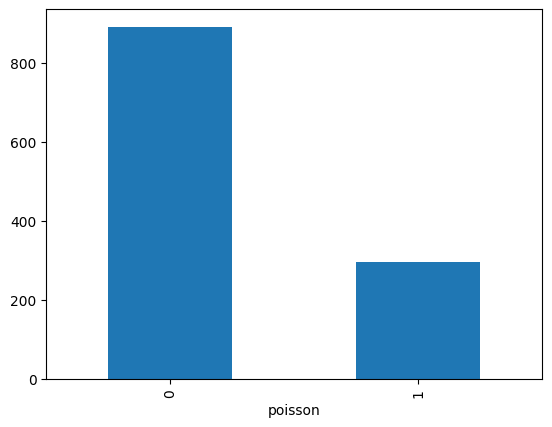

In [49]:
df_final["poisson"].value_counts().plot(kind = "bar")

In [50]:
df_final["bio"].value_counts()

bio
0    728
1    460
Name: count, dtype: int64

<Axes: xlabel='bio'>

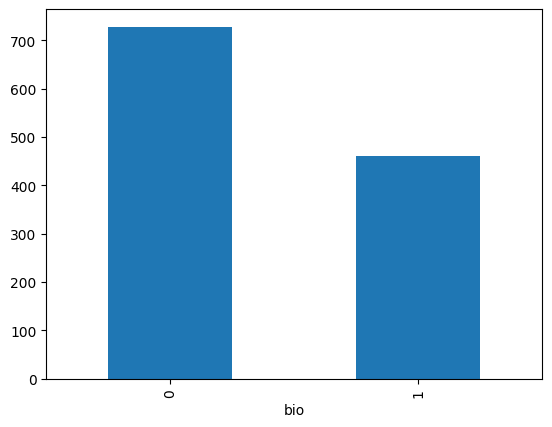

In [51]:
df_final["bio"].value_counts().plot(kind = "bar")

In [52]:
df_final["noel"].value_counts()

noel
0    1180
1       8
Name: count, dtype: int64

<Axes: xlabel='noel'>

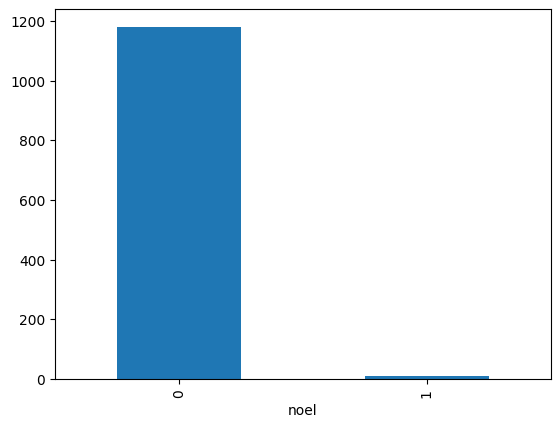

In [53]:
df_final["noel"].value_counts().plot(kind = "bar")

In [54]:
df_final["frites"].value_counts()

frites
0    1150
1      38
Name: count, dtype: int64

<Axes: xlabel='frites'>

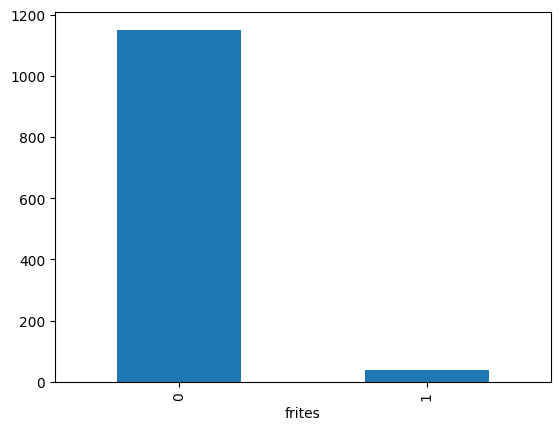

In [55]:
df_final["frites"].value_counts().plot(kind = "bar")

In [56]:
df_final["an_chinois"].value_counts()

an_chinois
0    1184
1       4
Name: count, dtype: int64

<Axes: xlabel='an_chinois'>

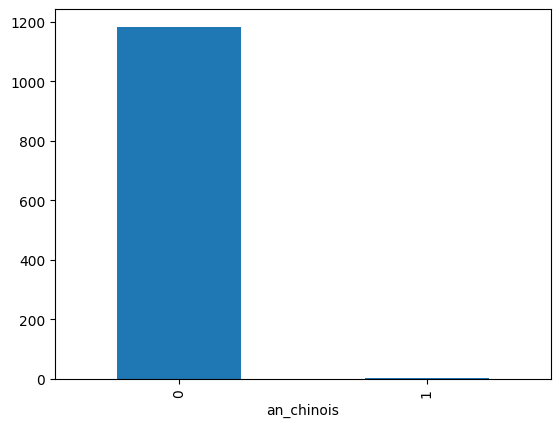

In [57]:
df_final["an_chinois"].value_counts().plot(kind = "bar")

In [58]:
# focus fréquentation réelle

<Axes: title={'center': 'fréquentation réelle par année'}, xlabel='annee_scolaire'>

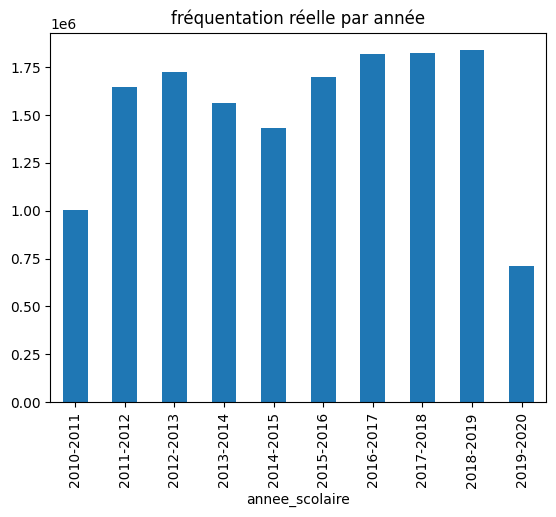

In [59]:
df_final.groupby("annee_scolaire").reel.sum().plot(kind = "bar", title="fréquentation réelle par année")

<Axes: title={'center': 'fréquentation réelle par mois'}, xlabel='mois'>

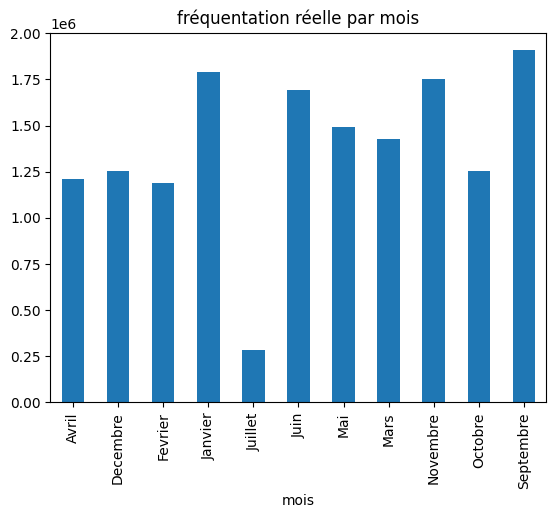

In [60]:
df_final.groupby("mois").reel.sum().plot(kind = "bar", title="fréquentation réelle par mois")

<Axes: title={'center': 'fréquentation réelle par semaine'}, xlabel='semaine'>

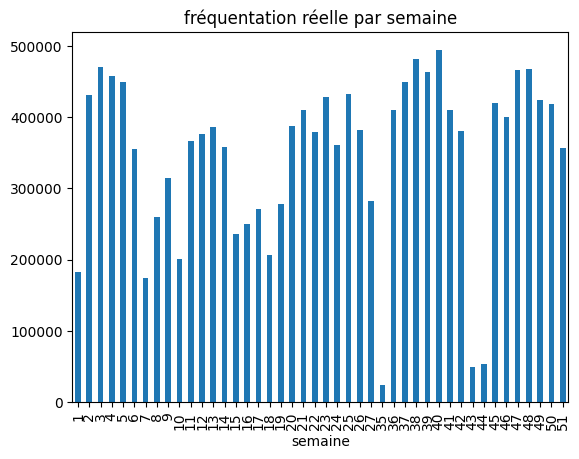

In [61]:
df_final.groupby("semaine").reel.sum().plot(kind = "bar", title="fréquentation réelle par semaine")

<Axes: title={'center': 'fréquentation réelle par jour'}, xlabel='jour'>

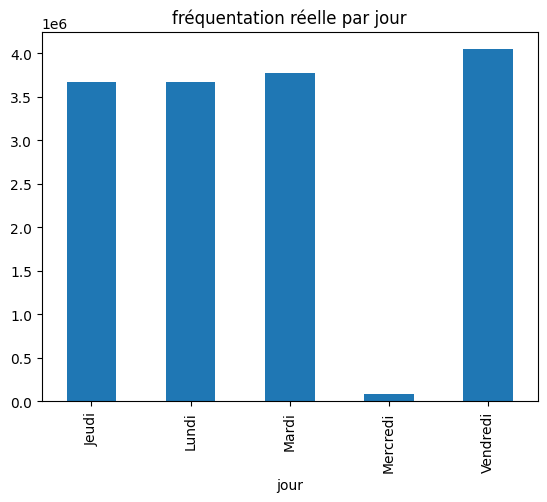

In [62]:
df_final.groupby("jour").reel.sum().plot(kind = "bar", title="fréquentation réelle par jour") 
# mercredi à supprimer 

In [63]:
# jours sans prévision ni fréquentation  (à supprimer)

df_final.loc[(df_final["prevision"] == 0) & (df_final["reel"] == 0)] 

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,frequentation
56,2011-05-02,2010-2011,Lundi,18,Mai,0,0,0,1,1,...,17652,"['Salade aux noix', 'paëlla au poulet', 'Liége...",0,1,0,0,0,0,0,0.0
57,2011-05-03,2010-2011,Mardi,18,Mai,0,0,0,0,1,...,17652,"['Crêpe au fromage', 'Steak haché', 'Haricots ...",0,1,0,0,0,0,0,0.0
58,2011-05-05,2010-2011,Jeudi,18,Mai,0,0,0,0,1,...,17652,"['céleri rémoulade maison', 'Rôti de porc', 'r...",1,1,0,0,0,0,0,0.0
59,2011-05-06,2010-2011,Vendredi,18,Mai,0,0,0,0,1,...,17652,"['Taboulé', 'Cube de poisson Dieppoise', 'épin...",0,0,1,0,0,0,0,0.0
73,2011-05-31,2010-2011,Mardi,22,Mai,1,0,0,0,0,...,17373,"['gréves', 'repas de depannage', 'ou froid']",0,0,0,0,0,0,0,0.0
79,2011-06-13,2010-2011,Lundi,24,Juin,0,1,0,0,0,...,17373,[],0,0,0,0,0,0,0,0.0
104,2011-09-27,2011-2012,Mardi,39,Septembre,1,0,0,0,0,...,17660,"['radis /beurre', 'Poulet rôti au jus', 'petit...",0,1,0,0,0,0,0,0.0
112,2011-10-11,2011-2012,Mardi,41,Octobre,0,0,0,0,0,...,17660,['grèves'],0,0,0,0,0,0,0,0.0
141,2011-12-13,2011-2012,Mardi,50,Decembre,1,0,0,0,0,...,17660,"['carottes râpées', 'paella fruits de mer', 'f...",0,0,0,0,0,0,0,0.0
142,2011-12-15,2011-2012,Jeudi,50,Decembre,1,0,0,0,0,...,17660,['repas greves'],0,0,0,0,0,0,0,0.0


In [64]:
# focus fréquentation(%)

In [65]:
df_final["frequentation"].sort_values()

141      0.000000
405      0.000000
57       0.000000
79       0.000000
407      0.000000
          ...    
678     78.973041
751     79.148633
1180    79.395697
673     79.523760
794     80.054993
Name: frequentation, Length: 1188, dtype: float64

<Axes: title={'center': 'frequentation'}, xlabel='jour'>

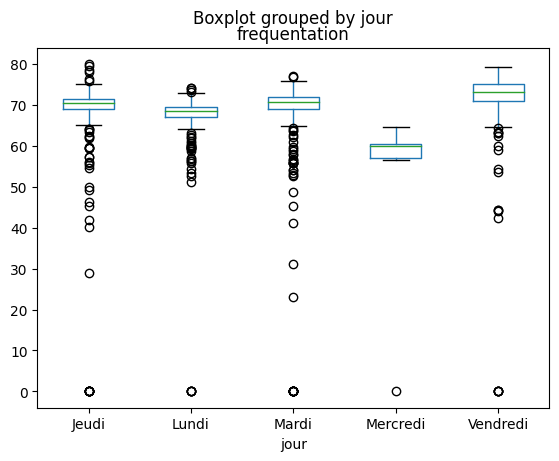

In [66]:
df_final.boxplot(by ='jour', column =['frequentation'], grid = False) 
# fréquentation <60% à supprimer

<Axes: title={'center': 'Pourcentage de fréquentation par jour'}, xlabel='jour'>

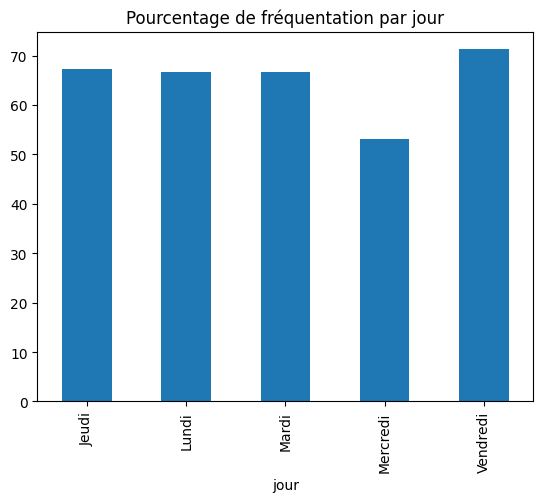

In [67]:
# Analyse de la fréquentation

df_final.groupby("jour").frequentation.mean().plot(kind = "bar", title="Pourcentage de fréquentation par jour")
#df_final.groupby("semaine").frequentation.mean().plot(kind = "bar", title="Pourcentage de fréquentation par semaine")
#df_final.groupby("mois").frequentation.mean().plot(kind = "bar", title="Pourcentage de fréquentation par mois")
#df_final.groupby("annee_scolaire").frequentation.mean().plot(kind = "bar", title="Pourcentage de fréquentation par année")

In [68]:
# focus effectifs

In [69]:
df_final.effectif.unique()

array([17373, 17652, 17660, 17955, 18123, 17842, 18243, 18633, 18497,
       19066, 19639, 19958, 20344, 20685], dtype=int64)

In [70]:
df_final.annee_scolaire.unique()

array(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020'],
      dtype=object)

<Axes: >

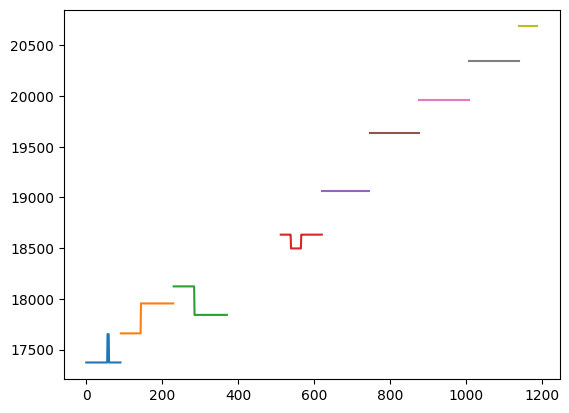

In [71]:
df_final.effectif[df_final["annee_scolaire"] == "2010-2011"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2011-2012"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2012-2013"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2014-2015"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2015-2016"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2016-2017"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2017-2018"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2018-2019"].plot(kind = "line")
df_final.effectif[df_final["annee_scolaire"] == "2019-2020"].plot(kind = "line")

# Nettoyage

In [72]:
# suppression des jours fériés et de la colonne ferié

df_final.drop(df_final[df_final["ferie"] == 1].index, inplace = True)
df_final.drop(["ferie"], axis = 1, inplace = True)

In [73]:
# suppression des mercredi

df_final.loc[df_final["jour"] == 'Mercredi']
df_final.drop(df_final[df_final["jour"] == 'Mercredi'].index, inplace = True)

In [74]:
# suppression des jours de grèves et de la colonne grèves

df_final.drop(df_final[df_final["greves"] == 1].index, inplace = True)
df_final.drop(["greves"], axis = 1, inplace = True)

In [75]:
# suppression des lignes vacances et de la colonne vacances

df_final.drop(df_final[df_final["vacances"] == 1].index, inplace = True)
df_final.drop(["vacances"], axis = 1, inplace = True)

In [76]:
# suppression des jours sans prévision et sans fréquentation

df_final.loc[(df_final["prevision"] == 0) & (df_final["reel"] == 0)]
df_final.drop(df_final[(df_final["prevision"] == 0) & (df_final["reel"] == 0)].index, inplace = True)

In [77]:
# suppression de la colonne menu

df_final.drop(["menu"], axis = 1, inplace = True)

In [78]:
# suppression des fréquentations inférieur à 60%

df_final.drop(df_final[df_final["frequentation"] < 60].index, inplace = True)

In [79]:
# modification des effectifs

    # df_final.loc[df_final["effectif"] == 18633]
    
    # (2011-2012) 17660 et 17955  
    # (2012-2013) 18123 et 17842
    # (2014-2015) 18633 et 18497

# df_final.effectif.replace(17660, 17955, inplace=True)
# df_final.effectif.replace(17842, 18123, inplace=True)

df_final.effectif.replace(18497, 18633, inplace=True)

In [80]:
df_final

,date,annee_scolaire,jour,semaine,mois,veille_ferie,retour_ferie,retour_vacances,veille_vacances,fete_musulmane,...,reel,effectif,porc,viande,poisson,bio,noel,frites,an_chinois,frequentation
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,1,0,0,...,11129,17373,0,1,0,0,0,0,0,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,11808,17373,0,1,0,0,0,0,0,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,11741,17373,1,1,0,1,0,0,0,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,12322,17373,0,0,1,0,0,0,0,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,11302,17373,0,0,1,0,0,0,0,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,...,15143,20685,0,0,0,1,0,0,0,73.207638
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,...,15954,20685,0,1,0,1,0,0,0,77.128354
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,14864,20685,0,1,0,1,0,0,0,71.858835
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,16423,20685,0,0,1,1,0,0,0,79.395697


# Analyse

## Etude de la fréquentation

### Fréquentation en fonction de la veille et du retour des fériés

In [81]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [82]:
#lm = ols('frequentation ~ veille_ferie', data = df_final).fit()
lm = ols('reel ~ effectif + veille_ferie', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.88e-283
Time:                        00:09:08   Log-Likelihood:                -7714.3
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2975.8576    316.335     -9.407      0.000   -3596.614   -2355.101
effectif         0.8663      0.017     51.706      0.000       0.833       0.899
veille_ferie  -163.7776    177.657     -0.922      0.357    -512.401     184.846
==============================================================================
Omnibus:                       12.487   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.719
Skew:                          -0.113   Prob(JB):                     0.000142
Kurtosis:                       3.611   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#lm = ols('frequentation ~ retour_ferie', data = df_final).fit()
lm = ols('reel ~ effectif + retour_ferie', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1336.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.72e-283
Time:                        00:09:08   Log-Likelihood:                -7714.6
No. Observations:                1003   AIC:                         1.544e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2969.4604    316.421     -9.385      0.000   -3590.386   -2348.535
effectif         0.8660      0.017     51.679      0.000       0.833       0.899
retour_ferie   -71.2510    122.906     -0.580      0.562    -312.434     169.932
==============================================================================
Omnibus:                       14.984   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.012
Skew:                          -0.132   Prob(JB):                     1.66e-05
Kurtosis:                       3.676   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Fréquentation en fonction de la veille et du retour des vacances

In [84]:
#lm = ols('frequentation ~ veille_vacances', data = df_final).fit()
lm = ols('reel ~ effectif + veille_vacances', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1353.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.88e-285
Time:                        00:09:08   Log-Likelihood:                -7710.0
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.544e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2982.5634    314.968     -9.469      0.000   -3600.637   -2364.490
effectif            0.8661      0.017     51.926      0.000       0.833       0.899
veille_vacances   306.8750     99.536      3.083      0.002     111.553     502.197
==============================================================================
Omnibus:                       17.474   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                          -0.135   Prob(JB):                     1.13e-06
Kurtosis:                       3.763   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#lm = ols('frequentation ~ retour_vacances', data = df_final).fit()
lm = ols('reel ~ effectif + veille_vacances', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     1353.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.88e-285
Time:                        00:09:08   Log-Likelihood:                -7710.0
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.544e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2982.5634    314.968     -9.469      0.000   -3600.637   -2364.490
effectif            0.8661      0.017     51.926      0.000       0.833       0.899
veille_vacances   306.8750     99.536      3.083      0.002     111.553     502.197
==============================================================================
Omnibus:                       17.474   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                          -0.135   Prob(JB):                     1.13e-06
Kurtosis:                       3.763   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Fréquentation en fonction de la religion 

In [86]:
#lm = ols('frequentation ~ fete_musulmane', data = df_final).fit()
lm = ols('reel ~ effectif + fete_musulmane', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1343.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.88e-284
Time:                        00:09:08   Log-Likelihood:                -7712.5
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2991.2930    315.880     -9.470      0.000   -3611.157   -2371.429
effectif           0.8674      0.017     51.832      0.000       0.835       0.900
fete_musulmane  -239.8742    114.237     -2.100      0.036    -464.046     -15.703
==============================================================================
Omnibus:                       15.881   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.952
Skew:                          -0.133   Prob(JB):                     6.29e-06
Kurtosis:                       3.709   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#lm = ols('frequentation ~ ramadan', data = df_final).fit()
lm = ols('reel ~ effectif + ramadan', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1370.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.77e-287
Time:                        00:09:08   Log-Likelihood:                -7705.3
No. Observations:                1003   AIC:                         1.542e+04
Df Residuals:                    1000   BIC:                         1.543e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3228.1275    318.977    -10.120      0.000   -3854.068   -2602.187
effectif       0.8806      0.017     51.994      0.000       0.847       0.914
ramadan     -318.0512     73.147     -4.348      0.000    -461.590    -174.513
==============================================================================
Omnibus:                       15.087   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.679
Skew:                          -0.123   Prob(JB):                     1.19e-05
Kurtosis:                       3.694   Cond. No.                     3.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
#lm = ols('frequentation ~ fete_chretienne', data = df_final).fit()
lm = ols('reel ~ effectif + fete_chretienne', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1335.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          4.31e-283
Time:                        00:09:08   Log-Likelihood:                -7714.7
No. Observations:                1003   AIC:                         1.544e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2973.7697    316.548     -9.394      0.000   -3594.943   -2352.596
effectif            0.8661      0.017     51.676      0.000       0.833       0.899
fete_chretienne    12.8553     62.947      0.204      0.838    -110.669     136.380
==============================================================================
Omnibus:                       14.569   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.469
Skew:                          -0.125   Prob(JB):                     2.18e-05
Kurtosis:                       3.671   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
#lm = ols('frequentation ~ fete_juive', data = df_final).fit()
lm = ols('reel ~ effectif + fete_juive', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1336.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.27e-283
Time:                        00:09:08   Log-Likelihood:                -7714.4
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2971.0651    316.351     -9.392      0.000   -3591.854   -2350.276
effectif       0.8661      0.017     51.694      0.000       0.833       0.899
fete_juive   -76.9651     99.979     -0.770      0.442    -273.158     119.228
==============================================================================
Omnibus:                       15.120   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.324
Skew:                          -0.132   Prob(JB):                     1.42e-05
Kurtosis:                       3.681   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Fréquentation en fonction du type de repas

In [90]:
#lm = ols('frequentation ~ porc', data = df_final).fit()
lm = ols('reel ~ effectif + porc', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1373.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.50e-287
Time:                        00:09:08   Log-Likelihood:                -7704.4
No. Observations:                1003   AIC:                         1.541e+04
Df Residuals:                    1000   BIC:                         1.543e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2824.1566    314.880     -8.969      0.000   -3442.058   -2206.255
effectif       0.8598      0.017     51.657      0.000       0.827       0.892
porc        -221.6218     48.612     -4.559      0.000    -317.015    -126.229
==============================================================================
Omnibus:                       19.786   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.335
Skew:                          -0.198   Prob(JB):                     7.03e-07
Kurtosis:                       3.722   Cond. No.                     3.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
#lm = ols('frequentation ~ viande', data = df_final).fit()
lm = ols('reel ~ effectif + viande ', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1962.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:09:08   Log-Likelihood:                -7567.5
No. Observations:                1003   AIC:                         1.514e+04
Df Residuals:                    1000   BIC:                         1.516e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2904.5838    273.257    -10.629      0.000   -3440.807   -2368.360
effectif       0.8784      0.014     60.638      0.000       0.850       0.907
viande      -538.8672     29.169    -18.474      0.000    -596.106    -481.628
==============================================================================
Omnibus:                      129.889   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.025
Skew:                          -0.661   Prob(JB):                     1.64e-81
Kurtosis:                       5.675   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#lm = ols('frequentation ~ poisson', data = df_final).fit()
lm = ols('reel ~ effectif + poisson', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1776.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:09:08   Log-Likelihood:                -7606.9
No. Observations:                1003   AIC:                         1.522e+04
Df Residuals:                    1000   BIC:                         1.523e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3009.6934    284.187    -10.591      0.000   -3567.365   -2452.022
effectif       0.8606      0.015     57.168      0.000       0.831       0.890
poisson      528.8744     34.140     15.491      0.000     461.879     595.870
==============================================================================
Omnibus:                       71.991   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.576
Skew:                          -0.389   Prob(JB):                     3.73e-40
Kurtosis:                       4.934   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
#lm = ols('frequentation ~ bio', data = df_final).fit()
lm = ols('reel ~ effectif + bio', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1343.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          5.37e-284
Time:                        00:09:08   Log-Likelihood:                -7712.6
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2811.0804    325.358     -8.640      0.000   -3449.544   -2172.617
effectif       0.8560      0.017     49.117      0.000       0.822       0.890
bio           73.2498     35.665      2.054      0.040       3.263     143.237
==============================================================================
Omnibus:                       15.734   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.879
Skew:                          -0.128   Prob(JB):                     6.53e-06
Kurtosis:                       3.711   Cond. No.                     3.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
#lm = ols('frequentation ~ noel', data = df_final).fit()
lm = ols('reel ~ effectif + noel', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1400.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.41e-290
Time:                        00:09:08   Log-Likelihood:                -7697.4
No. Observations:                1003   AIC:                         1.540e+04
Df Residuals:                    1000   BIC:                         1.542e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2986.3468    311.038     -9.601      0.000   -3596.708   -2375.986
effectif       0.8664      0.016     52.595      0.000       0.834       0.899
noel        1172.4796    197.851      5.926      0.000     784.228    1560.731
==============================================================================
Omnibus:                       17.210   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.704
Skew:                          -0.200   Prob(JB):                     1.17e-05
Kurtosis:                       3.619   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#lm = ols('frequentation ~ frite', data = df_final).fit()
lm = ols('reel ~ effectif + frites', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.69e-283
Time:                        00:09:09   Log-Likelihood:                -7714.2
No. Observations:                1003   AIC:                         1.543e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2973.2198    316.289     -9.400      0.000   -3593.886   -2352.554
effectif       0.8660      0.017     51.695      0.000       0.833       0.899
frites        94.6566     95.306      0.993      0.321     -92.366     281.679
==============================================================================
Omnibus:                       14.286   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.377
Skew:                          -0.114   Prob(JB):                     2.28e-05
Kurtosis:                       3.678   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#lm = ols('frequentation ~ an_chinois', data = df_final).fit()
lm = ols('reel ~ effectif + an_chinois', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1336.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.98e-283
Time:                        00:09:09   Log-Likelihood:                -7714.6
No. Observations:                1003   AIC:                         1.544e+04
Df Residuals:                    1000   BIC:                         1.545e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2963.8959    316.935     -9.352      0.000   -3585.830   -2341.962
effectif       0.8656      0.017     51.579      0.000       0.833       0.899
an_chinois  -137.5808    307.295     -0.448      0.654    -740.599     465.437
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.643
Skew:                          -0.126   Prob(JB):                     2.00e-05
Kurtosis:                       3.674   Cond. No.                     3.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fréquentation en fonction des mois

In [97]:
mois_dummies = pd.get_dummies(df_final.mois, dtype = "int64")
df_final = df_final.join(mois_dummies)

In [98]:
df_final.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'veille_ferie',
       'retour_ferie', 'retour_vacances', 'veille_vacances', 'fete_musulmane',
       'ramadan', 'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif', 'porc', 'viande',
       'poisson', 'bio', 'noel', 'frites', 'an_chinois', 'frequentation',
       'Avril', 'Decembre', 'Fevrier', 'Janvier', 'Juillet', 'Juin', 'Mai',
       'Mars', 'Novembre', 'Octobre', 'Septembre'],
      dtype='object')

In [99]:
#'reel ~ effectif + Janvier + Fevrier + Mars + Avril + Mai + Juin + Juillet + Septembre + Octobre + Novembre + Decembre'
lm = ols('reel ~ effectif + Fevrier + Juin + Juillet + Septembre + Decembre', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     550.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.85e-312
Time:                        00:09:09   Log-Likelihood:                -7633.5
No. Observations:                1003   AIC:                         1.528e+04
Df Residuals:                     996   BIC:                         1.532e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2817.6433    295.653     -9.530      0.000   -3397.817   -2237.470
effectif       0.8626      0.016     55.102      0.000       0.832       0.893
Fevrier     -143.8269     59.311     -2.425      0.015    -260.215     -27.439
Juin        -473.2940     49.998     -9.466      0.000    -571.408    -375.180
Juillet    -1284.1815    149.245     -8.605      0.000   -1577.052    -991.312
Septembre   -159.4187     48.160     -3.310      0.001    -253.925     -64.913
Decembre     130.8153     58.149      2.250      0.025      16.707     244.923
==============================================================================
Omnibus:                        5.444   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                6.148
Skew:                           0.090   Prob(JB):                       0.0462
Kurtosis:                       3.339   Cond. No.                     3.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fréquentation en fonction des jours

In [100]:
jour_dummies = pd.get_dummies(df_final.jour, dtype = "int64")
df_final = df_final.join(jour_dummies)

In [101]:
df_final.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'veille_ferie',
       'retour_ferie', 'retour_vacances', 'veille_vacances', 'fete_musulmane',
       'ramadan', 'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif', 'porc', 'viande',
       'poisson', 'bio', 'noel', 'frites', 'an_chinois', 'frequentation',
       'Avril', 'Decembre', 'Fevrier', 'Janvier', 'Juillet', 'Juin', 'Mai',
       'Mars', 'Novembre', 'Octobre', 'Septembre', 'Jeudi', 'Lundi', 'Mardi',
       'Vendredi'],
      dtype='object')

In [102]:
# Lundi + Mardi + Jeudi + Vendredi
lm = ols('reel ~ effectif + Lundi + Vendredi', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1539.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:09:09   Log-Likelihood:                -7500.9
No. Observations:                1003   AIC:                         1.501e+04
Df Residuals:                     999   BIC:                         1.503e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3041.1442    255.944    -11.882      0.000   -3543.393   -2538.895
effectif       0.8698      0.014     64.180      0.000       0.843       0.896
Lundi       -457.0808     33.526    -13.634      0.000    -522.870    -391.292
Vendredi     411.2104     32.525     12.643      0.000     347.385     475.036
==============================================================================
Omnibus:                      159.117   Durbin-Watson:                   1.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.075
Skew:                          -0.760   Prob(JB):                    1.58e-114
Kurtosis:                       6.198   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Etude de la saisonnalité des maladies

### Grippe

<Axes: title={'center': 'Incidence de la grippe en fonction du mois'}, xlabel='mois'>

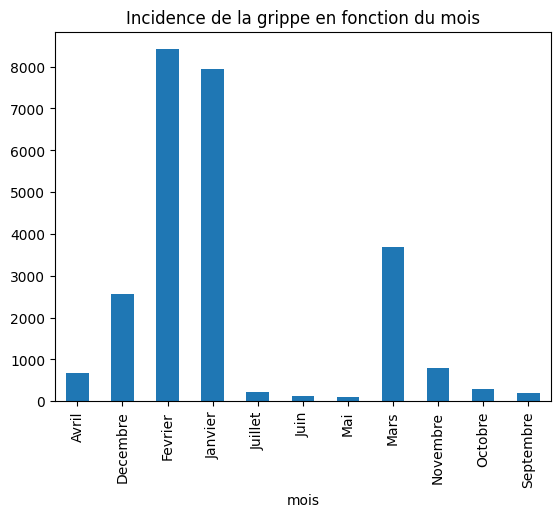

In [103]:
df_final.groupby("mois").inc_grippe.mean().plot(kind = "bar", title = "Incidence de la grippe en fonction du mois")

# Saisonnalité hivernale : la grippe impacte plus les mois de Décembre, Janvier, Février, Mars

In [104]:
lm = ols('inc_grippe ~ mois', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_grippe   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     67.56
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.05e-105
Time:                        00:09:09   Log-Likelihood:                -9672.7
No. Observations:                1003   AIC:                         1.937e+04
Df Residuals:                     992   BIC:                         1.942e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           674.2394    445.411      1.514      0.130    -199.816    1548.295
mois[T.Decembre]   1900.3285    610.155      3.115      0.002     702.987    3097.670
mois[T.Fevrier]    7743.0811    615.611     12.578      0.000    6535.032    8951.131
mois[T.Janvier]    7280.1686    557.742     13.053      0.000    6185.678    8374.659
mois[T.Juillet]    -459.4213   1216.105     -0.378      0.706   -2845.855    1927.013
mois[T.Juin]       -549.0220    566.459     -0.969      0.333   -1660.617     562.573
mois[T.Mai]        -564.3109    584.912     -0.965      0.335   -1712.119     583.497
mois[T.Mars]       3003.3606    595.734      5.041      0.000    1834.317    4172.404
mois[T.Novembre]    120.1843    563.703      0.213      0.831    -986.003    1226.372
mois[T.Octobre]    -389.0147    597.208     -0.651      0.515   -1560.951     782.921
mois[T.Septembre]  -468.0268    556.149     -0.842      0.400   -1559.391     623.337
==============================================================================
Omnibus:                      831.205   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23842.786
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      25.742   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gastro

<Axes: title={'center': 'Incidence de la gastro en fonction du mois'}, xlabel='mois'>

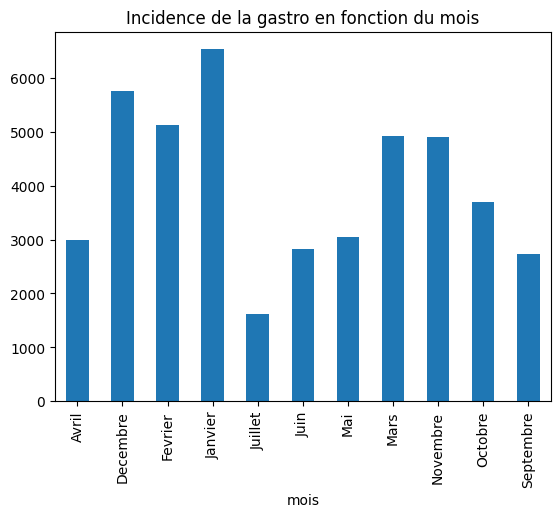

In [105]:
df_final.groupby("mois").inc_gastro.mean().plot(kind = "bar", title="Incidence de la gastro en fonction du mois")

# Saisonnalité hivernale : la gastro impacte plus les mois d'Octobre, Novembre, Décembre, Janvier, Février, Mars

In [106]:
lm = ols('inc_gastro ~ mois', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_gastro   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.91
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           1.04e-61
Time:                        00:09:09   Log-Likelihood:                -9160.8
No. Observations:                1003   AIC:                         1.834e+04
Df Residuals:                     992   BIC:                         1.840e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2990.2958    267.364     11.184      0.000    2465.632    3514.959
mois[T.Decembre]   2765.6178    366.254      7.551      0.000    2046.897    3484.339
mois[T.Fevrier]    2133.8709    369.529      5.775      0.000    1408.723    2859.019
mois[T.Janvier]    3544.6962    334.792     10.588      0.000    2887.714    4201.679
mois[T.Juillet]   -1368.8412    729.984     -1.875      0.061   -2801.331      63.648
mois[T.Juin]       -168.8610    340.024     -0.497      0.620    -836.111     498.389
mois[T.Mai]          61.8879    351.102      0.176      0.860    -627.099     750.875
mois[T.Mars]       1928.2709    357.597      5.392      0.000    1226.537    2630.005
mois[T.Novembre]   1914.6873    338.371      5.659      0.000    1250.683    2578.691
mois[T.Octobre]     701.7492    358.482      1.958      0.051      -1.721    1405.220
mois[T.Septembre]  -266.0911    333.836     -0.797      0.426    -921.197     389.015
==============================================================================
Omnibus:                      123.025   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.673
Skew:                           0.903   Prob(JB):                     1.94e-38
Kurtosis:                       3.945   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Varicelle

<Axes: title={'center': 'Incidence de la varicelle en fonction du mois'}, xlabel='mois'>

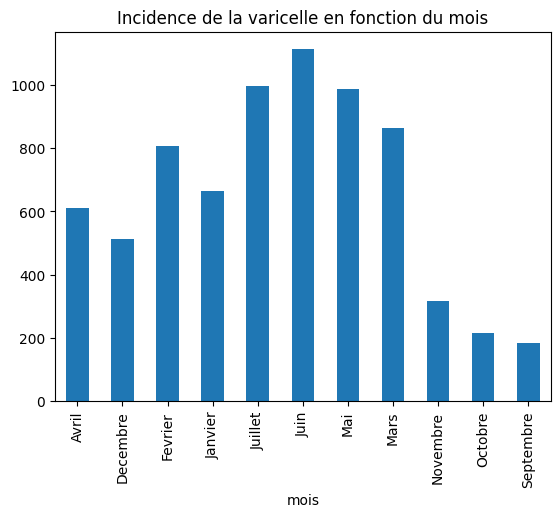

In [107]:
df_final.groupby("mois").inc_varicelle.mean().plot(kind = "bar", title="Incidence de la varicelle en fonction du mois")

# Saisonnalité hivernale et printanière : la varicelle impacte plus les mois Décembre, Janvier, Févirer, Mars, Avril, Mai, Juin et Juillet

In [108]:
lm = ols('inc_varicelle ~ mois', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          inc_varicelle   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     21.41
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.10e-36
Time:                        00:09:09   Log-Likelihood:                -7971.0
No. Observations:                1003   AIC:                         1.596e+04
Df Residuals:                     992   BIC:                         1.602e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           612.4507     81.649      7.501      0.000     452.227     772.674
mois[T.Decembre]   -100.2902    111.848     -0.897      0.370    -319.776     119.195
mois[T.Fevrier]     193.6390    112.848      1.716      0.086     -27.809     415.087
mois[T.Janvier]      52.8853    102.240      0.517      0.605    -147.746     253.517
mois[T.Juillet]     385.0948    222.925      1.727      0.084     -52.364     822.554
mois[T.Juin]        500.4623    103.838      4.820      0.000     296.695     704.230
mois[T.Mai]         375.3656    107.221      3.501      0.000     164.960     585.771
mois[T.Mars]        250.8604    109.204      2.297      0.022      36.562     465.159
mois[T.Novembre]   -294.8660    103.333     -2.854      0.004    -497.642     -92.090
mois[T.Octobre]    -397.3496    109.475     -3.630      0.000    -612.178    -182.521
mois[T.Septembre]  -426.9625    101.948     -4.188      0.000    -627.021    -226.904
==============================================================================
Omnibus:                      608.345   Durbin-Watson:                   0.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7367.408
Skew:                           2.588   Prob(JB):                         0.00
Kurtosis:                      15.227   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Sélection des Variables

In [109]:
df_final.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'veille_ferie',
       'retour_ferie', 'retour_vacances', 'veille_vacances', 'fete_musulmane',
       'ramadan', 'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro',
       'inc_varicelle', 'prevision', 'reel', 'effectif', 'porc', 'viande',
       'poisson', 'bio', 'noel', 'frites', 'an_chinois', 'frequentation',
       'Avril', 'Decembre', 'Fevrier', 'Janvier', 'Juillet', 'Juin', 'Mai',
       'Mars', 'Novembre', 'Octobre', 'Septembre', 'Jeudi', 'Lundi', 'Mardi',
       'Vendredi'],
      dtype='object')

In [110]:
# ANOVA

# (voir exemple TP2 ozone : supprimer petit à petit les variables en fonction des p-value (>5%))
# 'reel ~ effectif  + (annee_scolaire) + (semaine) + veille_ferie + retour_ferie + retour_vacances + veille_vacances + fete_musulmane + ramadan + fete_chretienne + fete_juive + inc_grippe + inc_gastro + inc_varicelle + prevision + porc + viande + poisson + bio + noel + frites + an_chinois + Avril + Decembre + Fevrier + Janvier + Juillet + Juin + Mai + Mars + Novembre + Octobre + Septembre + Jeudi + Lundi + Mardi + Vendredi - 1'

lm = ols('reel ~ effectif + veille_ferie + veille_vacances + inc_grippe + prevision + viande + poisson + noel + Juillet + Juin + Jeudi + Lundi + Mardi + Vendredi - 1', data = df_final).fit()

import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   reel   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     979.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:09:09   Log-Likelihood:                -7047.7
No. Observations:                1003   AIC:                         1.412e+04
Df Residuals:                     989   BIC:                         1.419e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
effectif            0.3208      0.029     11.114      0.000       0.264       0.377
veille_ferie     -420.6039     92.577     -4.543      0.000    -602.273    -238.935
veille_vacances  -223.8338     53.944     -4.149      0.000    -329.692    -117.976
inc_grippe         -0.0207      0.002    -11.136      0.000      -0.024      -0.017
prevision           0.5876      0.029     20.063      0.000       0.530       0.645
viande           -143.2460     28.931     -4.951      0.000    -200.019     -86.473
poisson            81.4378     27.419      2.970      0.003      27.631     135.245
noel              317.4351    114.082      2.783      0.005      93.564     541.306
Juillet         -1241.5734     85.302    -14.555      0.000   -1408.967   -1074.180
Juin             -423.9373     28.379    -14.938      0.000    -479.628    -368.247
Jeudi            -720.2803    194.608     -3.701      0.000   -1102.173    -338.388
Lundi            -989.1960    199.089     -4.969      0.000   -1379.882    -598.510
Mardi            -702.2717    194.612     -3.609      0.000   -1084.172    -320.372
Vendredi         -673.3516    190.847     -3.528      0.000   -1047.863    -298.840
==============================================================================
Omnibus:                      377.368   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.087
Skew:                          -1.251   Prob(JB):                         0.00
Kurtosis:                      15.430   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modélisation

In [111]:
# Création du dataframe pour la modélisation avec les variables d'intérêt

df_modelisation = df_final[["annee_scolaire","prevision", "reel", "effectif", "veille_ferie", "veille_vacances", "inc_grippe", "viande", "poisson", "noel", "Juillet", "Juin", "Jeudi", "Lundi", "Mardi", "Vendredi"]]

In [112]:
# Création des jeux d'entrainement (df_train, années 2010-2018) et de test (df_test, années 2018-2019)  

df_train = df_modelisation.loc[df_modelisation["annee_scolaire"] != "2018-2019"] 
df_test = df_modelisation.loc[df_modelisation["annee_scolaire"] == "2018-2019"]

## Régression Linéaire

In [113]:
# équation de la droite de regression donnée d'entrainement
from scipy.stats import linregress
a, b, r, p_value, std_err = linregress(df_train["prevision"], df_train["reel"])
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

a   =   0.935
b   = 226.115
r^2 = 0.88113


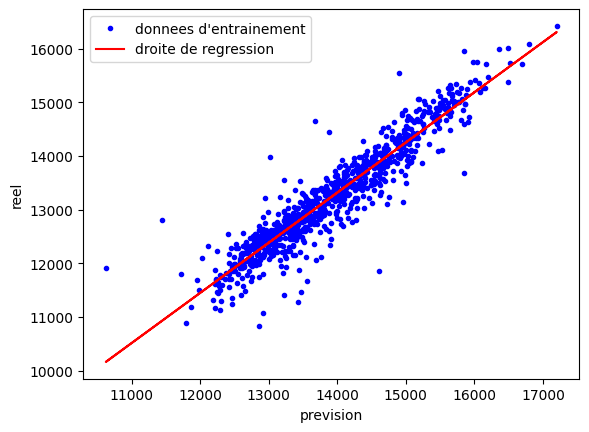

In [114]:
plt.xlabel('prevision')
plt.ylabel('reel')

plt.plot(df_train["prevision"], df_train["reel"], 'bo', markersize = 3, label = "donnees d'entrainement")
plt.plot(df_train["prevision"], 0.935 * df_train["prevision"] + 226.115, "r-", label = "droite de regression")

plt.legend() 
plt.show()

In [115]:
# équation de la droite de regression donnée de test
a, b, r, p_value, std_err = linregress(df_test["prevision"], df_test["reel"])
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))

a   =   0.765
b   =2726.960
r^2 = 0.37856


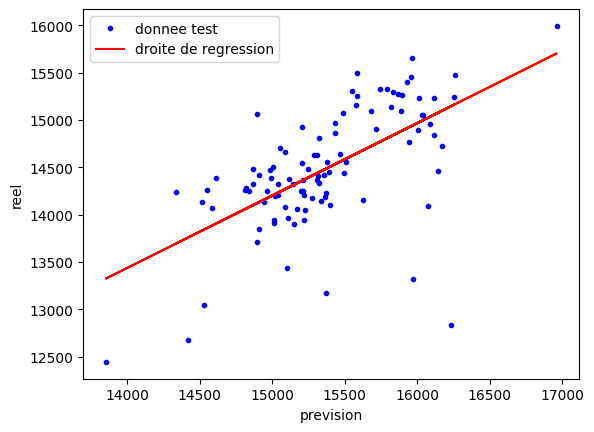

In [116]:
plt.xlabel('prevision')
plt.ylabel('reel')


plt.plot(df_test["prevision"], df_test["reel"], 'bo', markersize = 3, label = "donnee test")
plt.plot(df_test["prevision"], 0.765 * df_test["prevision"] + 2726.960, "r-", label = "droite de regression")

plt.legend() 
plt.show()

In [117]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
regr = linear_model.LinearRegression()

In [119]:
# (X = les variables corrélées et y = ce que l'on cherche (ici réel))
x_train = np.array(df_train[["prevision","effectif", "veille_ferie", "veille_vacances", "inc_grippe", "viande", "poisson", "noel", "Juillet", "Juin", "Jeudi", "Lundi", "Mardi", "Vendredi"]])
#x_train = np.array(df_train[["prevision","effectif", "veille_vacances", "viande", "poisson", "noel", "Juillet", "Juin", "Lundi", "Vendredi"]])
y_train = df_train["reel"]

x_test = np.array(df_test[["prevision","effectif", "veille_ferie", "veille_vacances", "inc_grippe", "viande", "poisson", "noel", "Juillet", "Juin", "Jeudi", "Lundi", "Mardi", "Vendredi"]])
#x_test = np.array(df_test[["prevision","effectif", "veille_vacances", "viande", "poisson", "noel", "Juillet", "Juin", "Lundi", "Vendredi"]])
y_test = df_test["reel"]

In [120]:
regr.fit(x_train,y_train)

LinearRegression()

In [121]:
y_pred_train = regr.predict(x_train)
y_pred_test = regr.predict(x_test)

In [122]:
r2_score(y_train, y_pred_train)

0.9359400041619194

In [123]:
r2_score(y_test, y_pred_test)

0.47466059202246225

In [124]:
compa = pd.DataFrame ()

In [125]:
# Sauvegarde du score
compa.loc['score', 'reg_lin'] = round(r2_score(y_test, y_pred_test),3)

In [126]:
compa

,reg_lin
score,0.475


In [127]:
# Equation de la droite du modèle : y = beta1 + beta2 * x 

In [128]:
# beta1
regr.intercept_ 

-1098.3110355087229

In [129]:
# beta2
regr.coef_ 

array([ 6.13886744e-01,  3.19192818e-01, -4.94667449e+02, -1.60007246e+02,
       -2.12738387e-02, -1.30992092e+02,  6.67764068e+01,  2.57821885e+02,
       -1.25153127e+03, -4.19255378e+02,  4.91221889e+01, -2.20618496e+02,
        6.83806961e+01,  1.03115611e+02])

## Ridge Regression

In [130]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.3)

In [131]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [132]:
y_pred = ridge.predict(x_test)

In [133]:
r2_score(y_test, y_pred)

0.4748399913415594

In [134]:
# Sauvegarde du score
compa.loc['score', 'Ridge'] = round(r2_score(y_test, y_pred),3)

In [135]:
compa

,reg_lin,Ridge
score,0.475,0.475


## Decision Trees

In [136]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [137]:
predicted = model.predict(x_test)

In [138]:
r2_score(y_test, predicted)

0.11796884729193158

In [139]:
# Sauvegarde du score
compa.loc['score', 'DTree']  = round(r2_score(y_test, predicted),3)

In [140]:
compa

,reg_lin,Ridge,DTree
score,0.475,0.475,0.118


## Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

RFRegressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [142]:
RFRegressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [143]:
y_pred = RFRegressor.predict(x_test)

In [144]:
r2_score(y_test, y_pred)

0.23081828638227564

In [145]:
# Sauvegarde du score
compa.loc['score', 'RForest'] = round(r2_score(y_test, y_pred),3)

In [146]:
compa

,reg_lin,Ridge,DTree,RForest
score,0.475,0.475,0.118,0.231


## Gradient Boosting Regressor

In [147]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [148]:
sc = StandardScaler()
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.transform(x_test)

In [149]:
gbr = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, min_samples_split = 5, learning_rate = 0.01, loss = 'squared_error')

In [150]:
gbr.fit(X_train_std, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, min_samples_split=5,
                          n_estimators=1000)

In [151]:
gbr.score(X_test_std, y_test)

0.3464402109832876

In [152]:
# Sauvegarde du score
compa.loc['score', 'GBR'] = round(gbr.score(X_test_std, y_test),3)

In [153]:
compa

,reg_lin,Ridge,DTree,RForest,GBR
score,0.475,0.475,0.118,0.231,0.346


## KNN 

In [154]:
from sklearn.neighbors import KNeighborsRegressor

In [155]:
# On récupère le régresseur le plus performant
knn = KNeighborsRegressor(n_neighbors=2) #hyperparamètre
knn.fit(x_train, y_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(x_test)

In [156]:
r2_score(predicted, np.array(y_test))

-0.12164385049703252

In [157]:
# On teste plusieurs K
scores =[]

for k in range(1,20) :
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)

# On récupère les prédictions sur les données test
    predicted= knn.predict(x_test)
    
    scores.append(r2_score(predicted, np.array(y_test)))

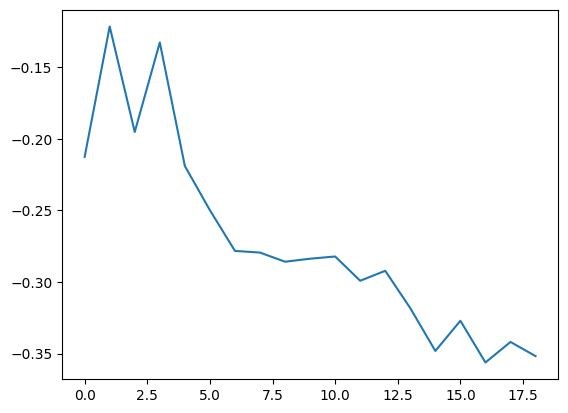

In [158]:
plt.plot(scores)

In [159]:
# Sauvegarde du score
compa.loc['score', 'KNN'] = round(r2_score(predicted, np.array(y_test)),3)

In [160]:
compa

,reg_lin,Ridge,DTree,RForest,GBR,KNN
score,0.475,0.475,0.118,0.231,0.346,-0.352


## Modele XGB

In [161]:
import xgboost as xg

In [162]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [163]:
xgb_r.fit(x_train, y_train)

[00:09:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [164]:
pred = xgb_r.predict(x_test)

In [165]:
r2_score(y_test, pred)

0.15794566396356857

In [166]:
# Sauvegarde du score
compa.loc['score', 'XGB'] = round(r2_score(y_test, pred),3)

In [167]:
compa

,reg_lin,Ridge,DTree,RForest,GBR,KNN,XGB
score,0.475,0.475,0.118,0.231,0.346,-0.352,0.158


# Conclusion : Analyse des performances du modèle

## Performances du modèle choisi (régression linéaire)

In [168]:
# création d'un dataframe de comparaison
df_compa = df_test[["effectif","reel", "prevision"]]

In [169]:
# calcul du gapillage reel
df_compa["gaspillage_reel"] = df_compa["prevision"] - df_compa["reel"]

In [170]:
# création de la colonne de prediction des fréquentations selon le modèle et passage en integer

df_compa["prediction"] = y_pred #+ 400 #(avec une majoration de 200 repas)

df_compa['prediction'] = df_compa['prediction'].astype(int)

In [171]:
# calcul du gaspillage des prédictions
df_compa["gaspillage_pred"] = df_compa["prediction"] - df_compa["reel"]

In [172]:
#calcul de l'écart de gaspillage entre les prédictions et le réel
df_compa["ecart"] = df_compa["gaspillage_reel"] - df_compa["gaspillage_pred"]

In [173]:
df_compa

,effectif,reel,prevision,gaspillage_reel,prediction,gaspillage_pred,ecart
1009,20344,14070,14582,512,13981,-89,601
1010,20344,14261,14553,292,13954,-307,599
1011,20344,14930,15206,276,14772,-158,434
1013,20344,14391,14611,220,13853,-538,758
1014,20344,14278,14820,542,14005,-273,815
...,...,...,...,...,...,...,...
1131,20344,13850,14910,1060,13929,79,981
1132,20344,13438,15105,1667,14058,620,1047
1135,20344,12443,13852,1409,13174,731,678
1137,20344,12678,14422,1744,13789,1111,633


In [174]:
df_compa.describe()

,effectif,reel,prevision,gaspillage_reel,prediction,gaspillage_pred,ecart
count,99.0,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,20344.0,14490.898990,15369.333333,878.434343,14699.636364,208.737374,669.696970
std,0.0,637.351671,512.327701,516.608527,560.672109,517.934390,154.012685
min,20344.0,12443.000000,13852.000000,-163.000000,13174.000000,-675.000000,373.000000
25%,20344.0,14178.000000,15028.000000,538.000000,14265.500000,-136.500000,575.000000
50%,20344.0,14422.000000,15315.000000,825.000000,14663.000000,133.000000,643.000000
75%,20344.0,14966.500000,15768.000000,1108.000000,15108.000000,431.000000,732.000000
max,20344.0,15993.000000,16962.000000,3401.000000,15912.000000,2779.000000,1050.000000


In [175]:
df_compa.gaspillage_pred.sort_values()

1020    -675
1044    -642
1022    -554
1013    -538
1033    -369
        ... 
1137    1111
1081    1322
1102    1523
1099    2168
1084    2779
Name: gaspillage_pred, Length: 99, dtype: int64

In [176]:
# Nombre jours en manque de repas 

# cantine
print('Jours en manque de repas (cantine) : ', len(df_compa.loc[df_compa.gaspillage_reel <-200 ]), 'jours')

# modèle
print('Jours en manque de repas (modèle) : ', len(df_compa.loc[df_compa.gaspillage_pred <-200 ]) , 'jours')

Jours en manque de repas (cantine) :  0 jours
Jours en manque de repas (modèle) :  16 jours


In [177]:
df_compa.loc[df_compa.gaspillage_pred < -200]

,effectif,reel,prevision,gaspillage_reel,prediction,gaspillage_pred,ecart
1010,20344,14261,14553,292,13954,-307,599
1013,20344,14391,14611,220,13853,-538,758
1014,20344,14278,14820,542,14005,-273,815
1016,20344,14130,14514,384,13821,-309,693
1018,20344,14480,14868,388,14225,-255,643
1020,20344,14241,14336,95,13566,-675,770
1022,20344,15060,14897,-163,14506,-554,391
1023,20344,15248,15587,339,14975,-273,612
1030,20344,15304,15552,248,14981,-323,571
1032,20344,14384,14990,606,14167,-217,823


In [178]:
# Calcul économie de repas sur l'année 2018-2019

# gaspillage de la cantine
print('Gaspillage de la cantine : ', df_compa["gaspillage_reel"].sum() )

# gaspillage du modèle
print('Gaspillage du modèle : ', df_compa["gaspillage_pred"].sum() )

# ecart de gaspillage
print('Différence de gaspillage : ', df_compa["gaspillage_reel"].sum() - df_compa["gaspillage_pred"].sum() )

# pourcentage de repas économisé
print('Repas économisé : ', (df_compa["gaspillage_reel"].sum() - df_compa["gaspillage_pred"].sum())/df_compa["gaspillage_reel"].sum()*100 , '%')

Gaspillage de la cantine :  86965
Gaspillage du modèle :  20665
Différence de gaspillage :  66300
Repas économisé :  76.23756683723337 %


In [179]:
# Résultats sans la majoration de 200 repas
    #Gaspillage de la cantine :  86965
    #Gaspillage du modèle :  20665
    #Différence de gaspillage :  66300
    #Repas économisé :  76.23756683723337 %
    #jours sans repas : 16

# Résultats avec la majoration de 200 repas
    #Gaspillage de la cantine :  86965
    #Gaspillage du modèle :  40465
    #Différence de gaspillage :  46500
    #Repas économisé :  53.46978669579716 %
    #jours sans repas : 4

# Résultats avec une majoration de 400 repas => Meilleur compromis
    #Gaspillage de la cantine :  86965
    #Gaspillage du modèle :  60265
    #Différence de gaspillage :  26700
    #Repas économisé :  30.70200655436095 %
    #jours sans repas : 2

## Test d'optimisation du modèle

In [180]:
#Test du modèle avec un coefficient alpha comprenant une marge de 200 repas
  
#alpha = (reel-200)/prediction

df_compa["pred_marge"] = (1 + (475/13566))*df_compa["prediction"]

df_compa['pred_marge'] = df_compa['pred_marge'].astype(int)

df_compa["gaspillage_pred_marge"] = df_compa["pred_marge"] - df_compa["reel"]


In [181]:
df_compa

,effectif,reel,prevision,gaspillage_reel,prediction,gaspillage_pred,ecart,pred_marge,gaspillage_pred_marge
1009,20344,14070,14582,512,13981,-89,601,14470,400
1010,20344,14261,14553,292,13954,-307,599,14442,181
1011,20344,14930,15206,276,14772,-158,434,15289,359
1013,20344,14391,14611,220,13853,-538,758,14338,-53
1014,20344,14278,14820,542,14005,-273,815,14495,217
...,...,...,...,...,...,...,...,...,...
1131,20344,13850,14910,1060,13929,79,981,14416,566
1132,20344,13438,15105,1667,14058,620,1047,14550,1112
1135,20344,12443,13852,1409,13174,731,678,13635,1192
1137,20344,12678,14422,1744,13789,1111,633,14271,1593


In [182]:
# Nombre jours en manque de repas 

# cantine
print('Jours en manque de repas (cantine) : ', len(df_compa.loc[df_compa.gaspillage_reel < -200]), 'jours')

# modèle
print('Jours en manque de repas (modèle) : ', len(df_compa.loc[df_compa.gaspillage_pred_marge < -200]) , 'jours')

Jours en manque de repas (cantine) :  0 jours
Jours en manque de repas (modèle) :  0 jours


In [183]:
# Calcul économie de repas sur l'année 2018-2019

# gaspillage de la cantine
print('Gaspillage de la cantine : ', df_compa["gaspillage_reel"].sum() )

# gaspillage du modèle
print('Gaspillage du modèle : ', df_compa["gaspillage_pred_marge"].sum() )

# ecart de gaspillage
print('Différence de gaspillage : ', df_compa["gaspillage_reel"].sum() - df_compa["gaspillage_pred_marge"].sum() )

# pourcentage de repas économisé
print('Repas économisé : ', (df_compa["gaspillage_reel"].sum() - df_compa["gaspillage_pred_marge"].sum())/df_compa["gaspillage_reel"].sum()*100 , '%')


Gaspillage de la cantine :  86965
Gaspillage du modèle :  71573
Différence de gaspillage :  15392
Repas économisé :  17.699074340251826 %


In [184]:

# Avec un alpha = 0,035 : pas de sous-production et une économie de 17 % sur les données de test
# Mais le gaspillage reste important
# Le modèle avec une majoration de 400 repas reste le meilleur compromis sur les données de test (31 % d'économie pour 2 jours en sous-production)


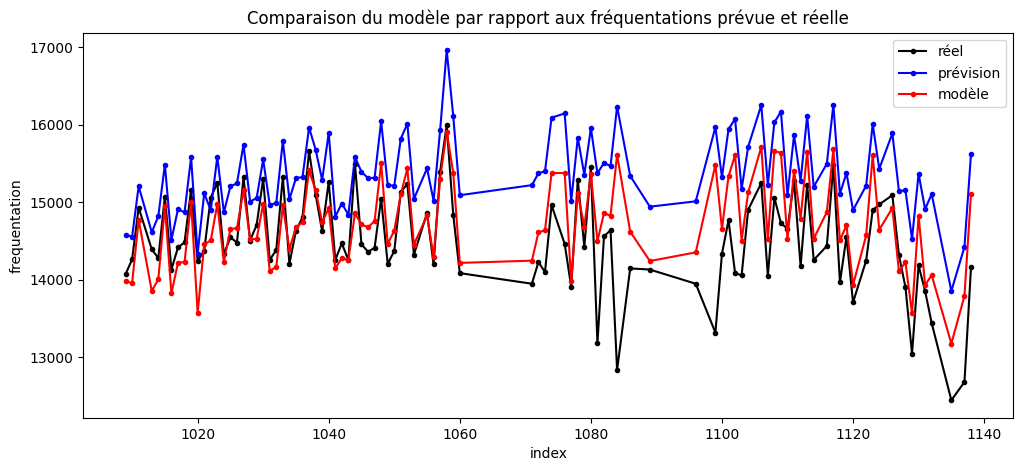

In [185]:
plt.figure(figsize=(12,5))

p1 = plt.plot(df_compa["reel"], 'ko-', markersize = 3)
p2 = plt.plot(df_compa["prevision"], 'bo-', markersize = 3)
p3 = plt.plot(df_compa["prediction"], 'ro-', markersize = 3)

plt.xlabel('index')
plt.ylabel('frequentation')
plt.title('Comparaison du modèle par rapport aux fréquentations prévue et réelle')
plt.legend((p1[0], p2[0], p3[0]), ('réel', 'prévision', 'modèle'))

plt.show()

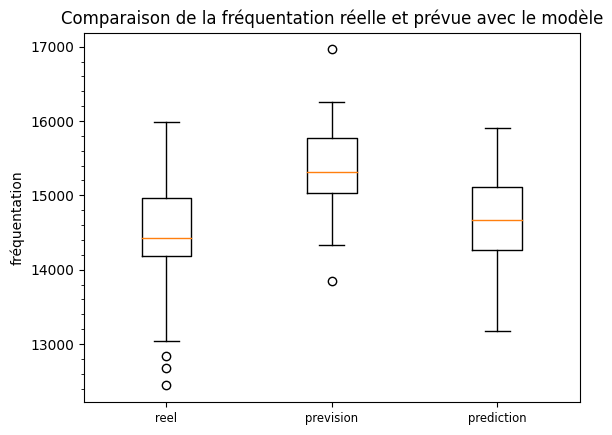

In [186]:
data = df_compa[["reel", "prevision","prediction"]]
bp = plt.boxplot(np.array(data),labels=list(data))

plt.title("Comparaison de la fréquentation réelle et prévue avec le modèle")
plt.ylabel("fréquentation")
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small')

plt.show()

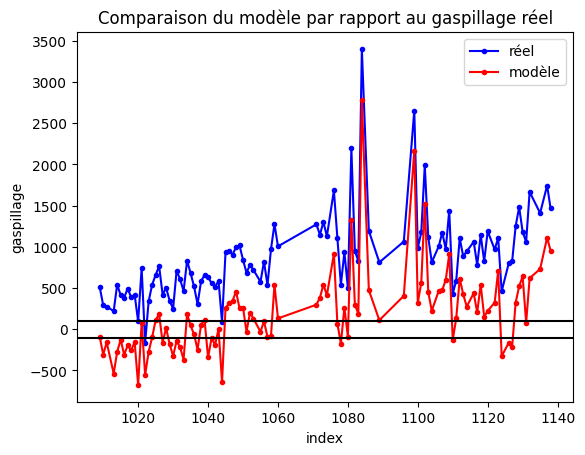

In [187]:
p1 = plt.plot(df_compa["gaspillage_reel"], 'bo-', markersize = 3)
p2 = plt.plot(df_compa["gaspillage_pred"], 'ro-', markersize = 3)

plt.axhline(y = 100, color = 'k', linestyle = '-') # limite de sur-production (gaspillage)
plt.axhline(y = -100, color = 'k', linestyle = '-') # limite de sous-production (manque de repas)

plt.title('Comparaison du modèle par rapport au gaspillage réel')
plt.xlabel('index')
plt.ylabel('gaspillage')
plt.legend((p1[0], p2[0]), ('réel', 'modèle'))

plt.show()

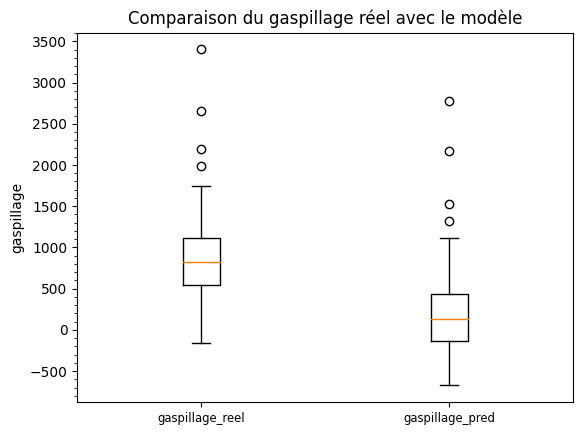

In [188]:
data = df_compa[["gaspillage_reel", "gaspillage_pred"]]
bp = plt.boxplot(np.array(data),labels=list(data))

plt.title("Comparaison du gaspillage réel avec le modèle")
plt.ylabel("gaspillage")
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small')

plt.show()